In [2]:
# Import libraries for analysis
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', None)

In [3]:
# Load and view dataset
df = pd.read_csv(r"C:\Users\Richmond\Desktop\Everything Data\Data Camp\Practice Exam\Professional Exam Project\product_sales.csv")
print(df.head())

   week  sales_method                           customer_id  nb_sold  revenue  \
0     2         Email  2e72d641-95ac-497b-bbf8-4861764a7097       10      NaN   
1     6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   225.47   
2     5          Call  d1de9884-8059-4065-b10f-86eef57e4a44       11    52.55   
3     4         Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11      NaN   
4     3         Email  10e6d446-10a5-42e5-8210-1b5438f70922        9    90.49   

   years_as_customer  nb_site_visits      state  
0                  0              24    Arizona  
1                  1              28     Kansas  
2                  6              26  Wisconsin  
3                  3              25    Indiana  
4                  0              28   Illinois  


In [4]:
# Data Validation
print(df.shape)

(15000, 8)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None


In [6]:
# Check unique values for sales_method column
print(df['sales_method'].unique())

['Email' 'Email + Call' 'Call' 'em + call' 'email']


In [7]:
print(df['customer_id'].nunique())

15000


In [8]:
# Replace em + call with Email + Call
df['sales_method'] = df['sales_method'].replace({'em + call':'Email + Call'})
df['sales_method'] = df['sales_method'].replace({'email':'Email'})
print(df['sales_method'].unique())

['Email' 'Email + Call' 'Call']


In [9]:
# Investigate null values
df['revenue'].describe()

count    13926.000000
mean        93.934943
std         47.435312
min         32.540000
25%         52.470000
50%         89.500000
75%        107.327500
max        238.320000
Name: revenue, dtype: float64

In [10]:
# Missing values for revenue column
median = 89.5
df['revenue'] = df['revenue'].fillna(median)

In [11]:
# Recheck for missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None


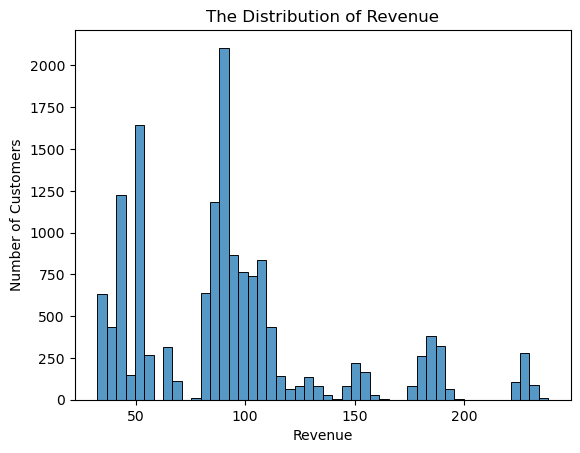

In [12]:
# Visualize revenue column
sns.histplot(x = 'revenue', data = df)
plt.xlabel("Revenue")
plt.ylabel("Number of Customers")
plt.title("The Distribution of Revenue")
plt.show()

In [13]:
# Finding outliers
first = np.quantile(df['revenue'], 0.25)
third = np.quantile(df['revenue'], 0.75)
iqr = third - first

lower_boundary = first - (1.5 * iqr)
upper_boundary = third + (1.5 * iqr)
print(upper_boundary)

185.61499999999998


In [14]:
# Further understanding of null values
print(df.isnull().sum())

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64


In [15]:
# Unique values for weeks
print(df['week'].unique())

[2 6 5 4 3 1]


In [56]:
# Years as customer cleaned
longest = 39
df.loc[df['years_as_customer'] > 39, 'years_as_customer'] = longest
print(df['years_as_customer'].nunique())

40


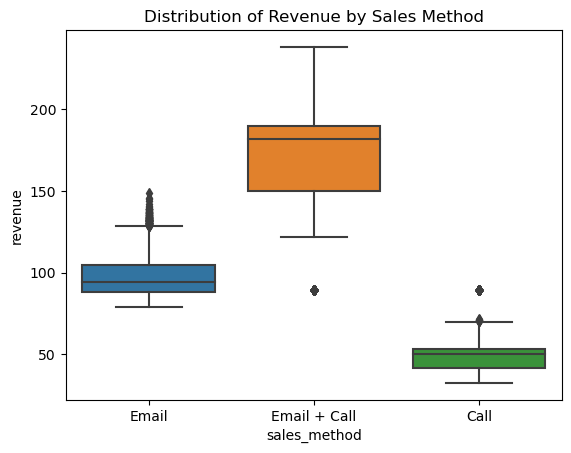

In [16]:
# Identifying the spread for a sales methods
sns.boxplot(x = 'sales_method', y = 'revenue', data = df)
plt.title("Distribution of Revenue by Sales Method")
plt.show()

In [17]:
# Number of customers for each approach
cus_group = df.groupby('sales_method')['customer_id'].count()
print(cus_group)

sales_method
Call            4962
Email           7466
Email + Call    2572
Name: customer_id, dtype: int64


In [18]:
# Revenue by sales method
revenue_by_method = df.groupby('sales_method')['revenue'].sum()
print(revenue_by_method)

sales_method
Call            243762.99
Email           721005.83
Email + Call    439492.19
Name: revenue, dtype: float64


In [19]:
# Mean revenue by sales method
mean_revenue = df.groupby('sales_method')['revenue'].mean()
print(mean_revenue)

sales_method
Call             49.125955
Email            96.571903
Email + Call    170.875657
Name: revenue, dtype: float64


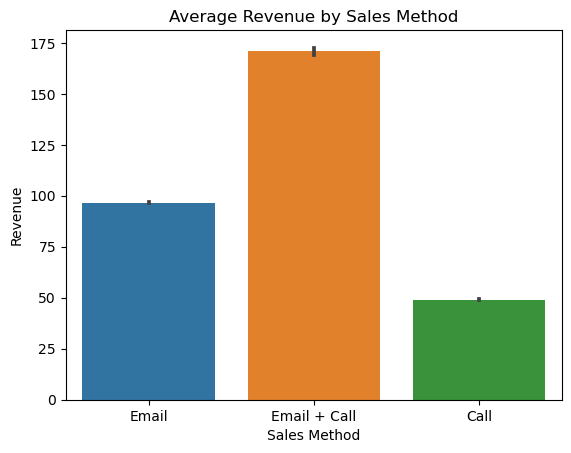

In [69]:
# Revenue by Sales Method
sns.barplot(x = 'sales_method', y = 'revenue', data = df)
plt.xlabel("Sales Method")
plt.ylabel("Revenue")
plt.title("Average Revenue by Sales Method")
plt.show()

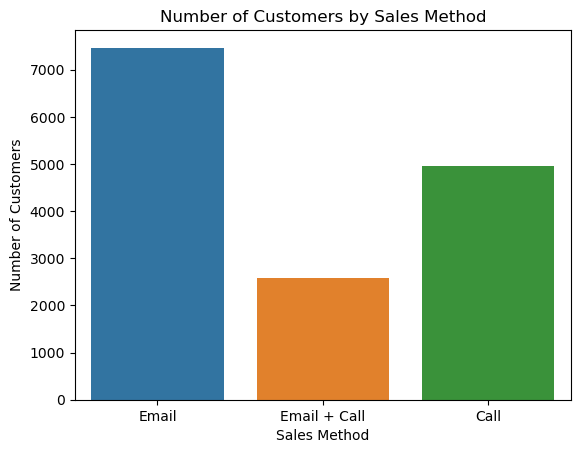

In [67]:
# Visualize 
sns.countplot(x = 'sales_method', data = df)
plt.xlabel("Sales Method")
plt.ylabel("Number of Customers")
plt.title("Number of Customers by Sales Method")
plt.show()

In [85]:
# Pivot table for average revenue per week
weekly_avg = df.pivot_table(values = 'revenue', index = 'sales_method', columns = 'week')
print(weekly_avg)

week                   1           2           3           4           5  \
sales_method                                                               
Call           36.636121   45.313068   43.559058   52.998498   54.434492   
Email          87.630924   99.358728   92.521426  107.344995  107.326312   
Email + Call  124.370473  144.858650  144.483677  169.384242  173.753774   

week                   6  
sales_method              
Call           67.259866  
Email         127.607868  
Email + Call  205.239400  


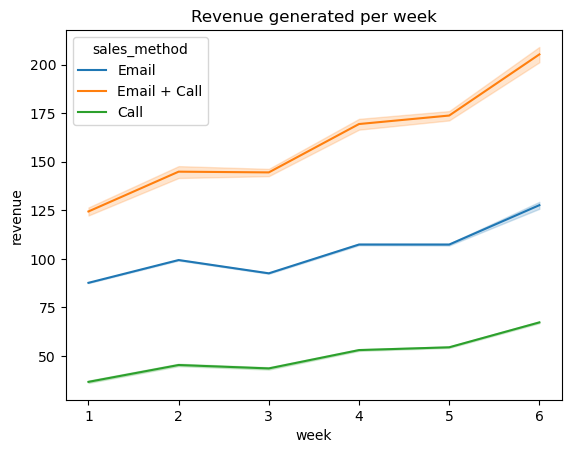

In [20]:
# Visualization for revenue over time
sns.lineplot(x = 'week', y = 'revenue', data = df, hue = 'sales_method')
plt.title("Revenue generated per week")
plt.show()

In [19]:
# Calculating revenue by number of products sold
nb_sold_revenue = df.groupby('nb_sold')['revenue'].sum()
print(nb_sold_revenue)

nb_sold
7      25420.40
8     127816.06
9     282140.47
10    334343.24
11    215881.89
12    174892.15
13    114792.29
14      8880.11
15    112980.60
16      7113.80
Name: revenue, dtype: float64


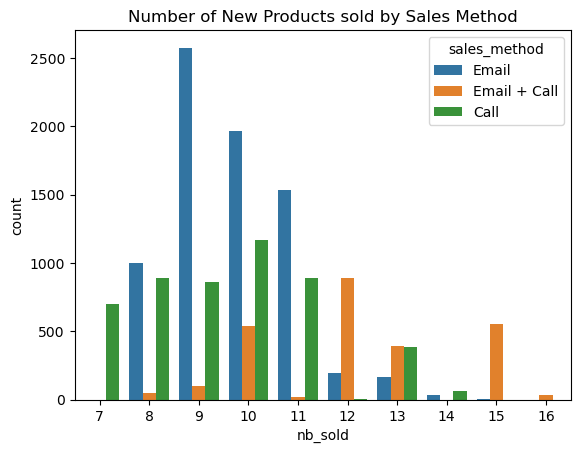

In [71]:
# Visualization of numbers sold
sns.countplot(x = 'nb_sold', hue = 'sales_method', data = df)
plt.title("Number of New Products sold by Sales Method")
plt.show()

In [22]:
# Quantiles
twenty_fifth = np.quantile(df['years_as_customer'], 0.25)
seventy_fifth = np.quantile(df['years_as_customer'], 0.75)
iqr = seventy_fifth - twenty_fifth

lower = twenty_fifth - (1.5 * iqr)
upper = seventy_fifth + (1.5 * iqr)
print(upper)

16.0


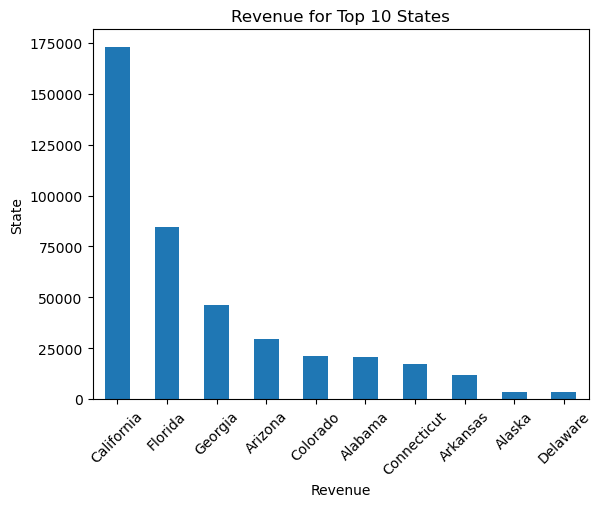

In [84]:
# Revenue by State
top_20 = df.groupby('state')['revenue'].sum().head(10).sort_values(ascending = False)
top_20.plot(kind = 'bar', rot = 45)
plt.xlabel("Revenue")
plt.ylabel("State")
plt.title("Revenue for Top 10 States")
plt.show()